In [13]:
import pandas as pd

In [14]:
plot_df = pd.concat([pd.DataFrame({'Week':[6,7,8,9],'Metric':'Acc.','Value':[.81,.82,.79,.83]}),
pd.DataFrame({'Week':[6,7,8,9],'Metric':'AUC','Value':[.87,.89,.87,.89]})],axis=0)

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Validation/Test Performance (by holdout week)')

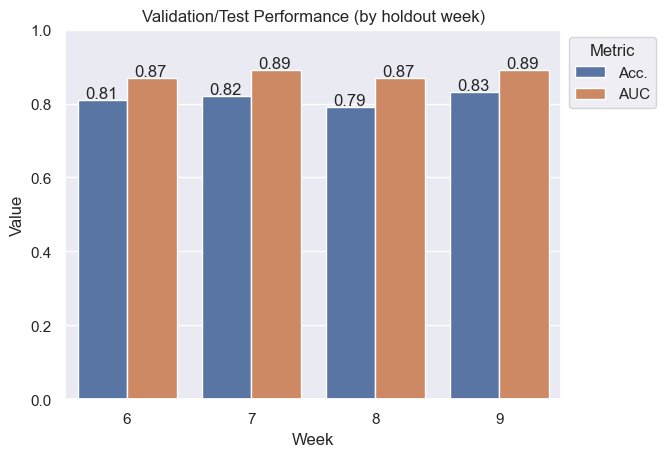

In [16]:
import seaborn as sns
from itertools import product

sns.set(style="darkgrid")

titanic = sns.load_dataset("titanic")

class_order = [6,7,8,9] 
hue_order = ['Acc.','AUC']
bar_order = product(class_order, hue_order)

catp = sns.barplot(data=plot_df, 
                   x='Week', y='Value', hue='Metric',
                   order = class_order, 
                   hue_order = hue_order)

catp.set_ylim(0,1.00)



# As long as we haven't plotted anything else into this axis,
# we know the rectangles in it are our barplot bars
# and we know the order, so we can match up graphic and calculations:

spots = zip(catp.patches, bar_order)
for spot in spots:
    class_total= .5
    class_who_total = .7
    height = spot[0].get_height() 
    catp.text(spot[0].get_x()+.06, height+.005,'{:1.2f}'.format(height))

sns.move_legend(catp, "upper left", bbox_to_anchor=(1, 1))
plt.title('Validation/Test Performance (by holdout week)')
